<a href="https://colab.research.google.com/github/slilim/django-stock/blob/main/MNIST_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


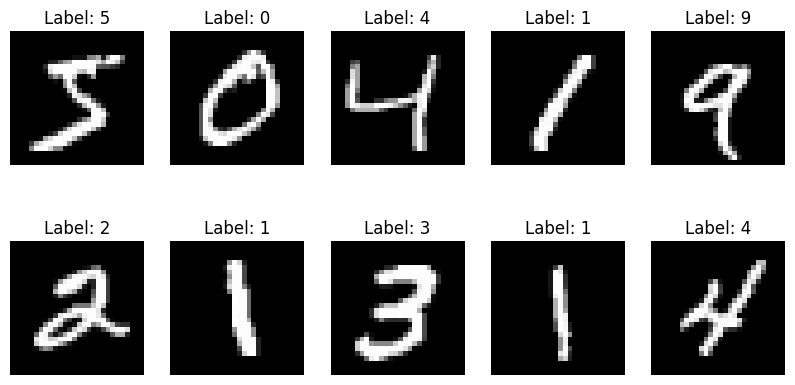

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Charger le MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Afficher quelques images de la base de données
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Charger le MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Diviser la base de données en ensembles d'apprentissage et de test
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#on charge les donnees
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

#pretraitement de donnees
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer un modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, solver='sgd', verbose=10, random_state=42, learning_rate_init=.1)

# Entraîner le modèle
mlp.fit(X_train_scaled, y_train)

# Prédire les étiquettes de classe pour les données de test
y_pred = mlp.predict(X_test_scaled)

# Évaluer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.28910092
Iteration 2, loss = 0.18382010
Iteration 3, loss = 0.17967675
Iteration 4, loss = 0.16938352
Iteration 5, loss = 0.17364649
Iteration 6, loss = 0.20576293
Iteration 7, loss = 0.27426958
Iteration 8, loss = 0.25935494
Iteration 9, loss = 0.23099371
Iteration 10, loss = 0.18336502
Iteration 11, loss = 0.15791124
Iteration 12, loss = 0.14493523
Iteration 13, loss = 0.11669069
Iteration 14, loss = 0.12940860
Iteration 15, loss = 0.14338050
Iteration 16, loss = 0.15399619
Iteration 17, loss = 0.14544866
Iteration 18, loss = 0.14553713
Iteration 19, loss = 0.15232594
Iteration 20, loss = 0.14094958
Précision du modèle : 95.66%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)



Matrice de confusion :
 [[1318    1    5    2    0    1    9    1    5    1]
 [   2 1568    8    1    0    0    3   10    5    3]
 [   1    6 1318    1    6    1   16   10   14    7]
 [   1    4   40 1327    0   13    0   17   15   16]
 [   1    1    9    1 1227    5   11   10    2   28]
 [   4    7    2   17    2 1223    7    1    9    1]
 [   3    1    1    0    4   11 1369    0    7    0]
 [   4    5   25    1    5    2    0 1433    3   25]
 [   8   10   13   13    5   17    6    7 1264   14]
 [   9    6    1    4   13    4    0   26   12 1345]]


In [ ]:
# Obtenez le nombre de couches
nombre_couches = len(mlp.coefs_)

# Obtenez le nombre de neurones dans chaque couche
neurones_par_couche = [couche.shape[0] for couche in mlp.coefs_]

print(f"Nombre de couches : {nombre_couches}")
print(f"Neurones par couche : {neurones_par_couche}")


Nombre de couches : 2
Neurones par couche : [784, 50]


Iteration 1, loss = 0.28910092
Iteration 2, loss = 0.18382010
Iteration 3, loss = 0.17967675
Iteration 4, loss = 0.16938352
Iteration 5, loss = 0.17364649
Iteration 6, loss = 0.20576293
Iteration 7, loss = 0.27426958
Iteration 8, loss = 0.25935494
Iteration 9, loss = 0.23099371
Iteration 10, loss = 0.18336502
Iteration 11, loss = 0.15791124
Iteration 12, loss = 0.14493523
Iteration 13, loss = 0.11669069
Iteration 14, loss = 0.12940860
Iteration 15, loss = 0.14338050
Iteration 16, loss = 0.15399619
Iteration 17, loss = 0.14544866
Iteration 18, loss = 0.14553713
Iteration 19, loss = 0.15232594
Iteration 20, loss = 0.14094958


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


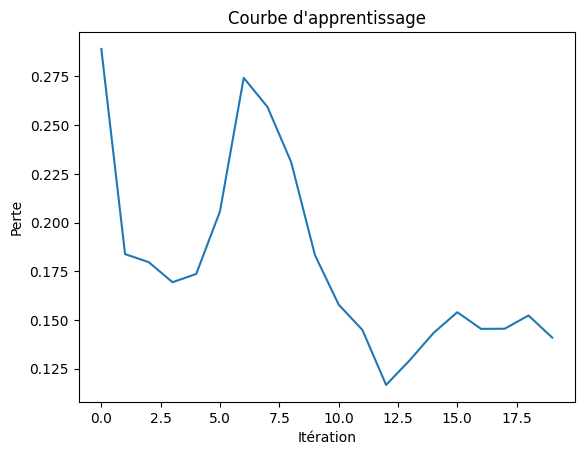

In [ ]:
import matplotlib.pyplot as plt

# Entraîner le modèle avec le suivi de la perte
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, solver='sgd', verbose=10, random_state=42, learning_rate_init=.1)
training_loss = mlp.fit(X_train_scaled, y_train).loss_curve_

# Afficher la courbe de la perte
plt.plot(training_loss)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Itération')
plt.ylabel('Perte')
plt.show()



Iteration 1, loss = 22577.72933720
Iteration 2, loss = 23936.80073025
Iteration 3, loss = 23930.11263460
Iteration 4, loss = 23923.42702681
Iteration 5, loss = 23916.74183376
Iteration 6, loss = 23910.05879382
Iteration 7, loss = 23903.37707617
Iteration 8, loss = 23896.69679648
Iteration 9, loss = 23890.01672317
Iteration 10, loss = 23883.33769192
Iteration 11, loss = 23876.66084416
Iteration 12, loss = 23869.98530852
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 22577.72933720
Iteration 2, loss = 23936.80073025
Iteration 3, loss = 23930.11263460
Iteration 4, loss = 23923.42702681
Iteration 5, loss = 23916.74183376
Iteration 6, loss = 23910.05879382
Iteration 7, loss = 23903.37707617
Iteration 8, loss = 23896.69679648
Iteration 9, loss = 23890.01672317
Iteration 10, loss = 23883.33769192
Iteration 11, loss = 23876.66084416
Iteration 12, loss = 23869.98530852
Training loss did not improve more than tol=0.000100 for 10 cons

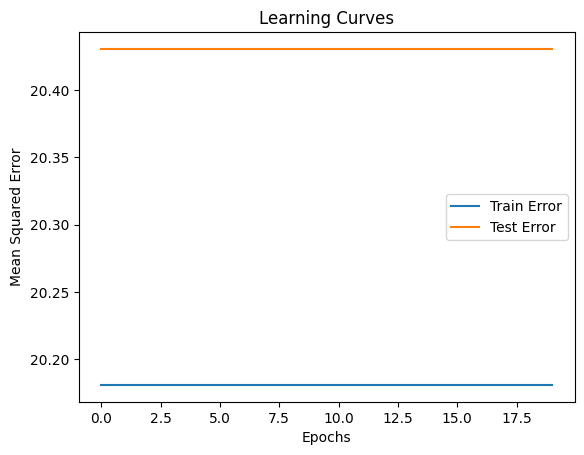

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error


# Assuming you have already split your data into X_train, X_test, y_train, y_test


# Créer un modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, solver='sgd', verbose=10, random_state=42, learning_rate_init=.1)
# Lists to store the error rates for each epoch
train_errors, test_errors = [], []
# We will train the MLP for a certain number of epochs
for i in range(1, 21):
    mlp.fit(X_train, y_train)

    # Make predictions
    train_predictions = mlp.predict(X_train)
    test_predictions = mlp.predict(X_test)

    # Calculate the mean squared error for the current model
    train_error = mean_squared_error(y_train, train_predictions)
    test_error = mean_squared_error(y_test, test_predictions)

    # Store the error rates
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Increment the number of iterations for the next training cycle
    mlp.max_iter += 1

# Plotting the learning curves
plt.plot(train_errors, label='Train Error')
plt.plot(test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

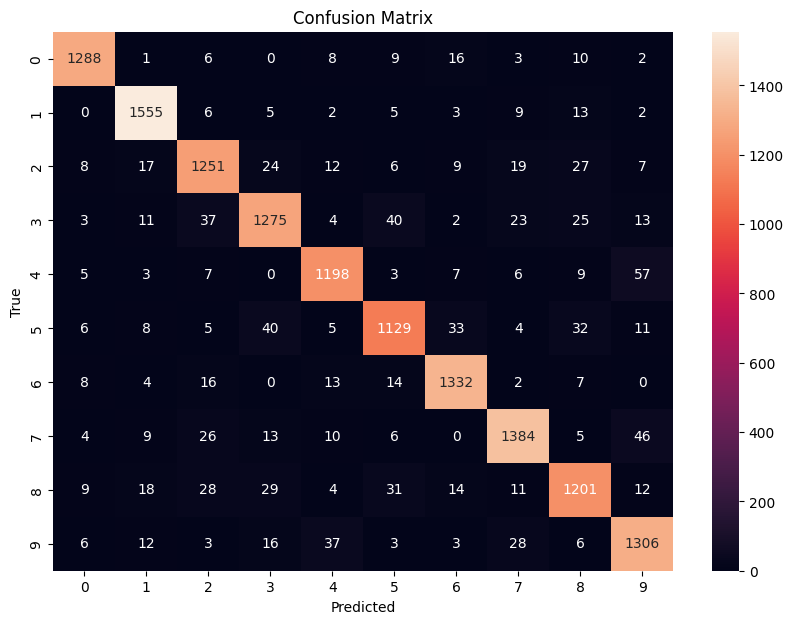

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's important to scale the data before training the MLP
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)

# Train the model with the training data
mlp.fit(X_train_scaled, y_train)

# You can then use the trained model to make predictions and evaluate its performance
predictions = mlp.predict(X_test_scaled)
# Assuming you have already trained your classifier and it is named `classifier`
# and you have the true labels and predictions named `y_test` and `predictions`, respectively.

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn to make it more visually appealing
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/20
1400/1400 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.9188 - val_loss: 0.2343 - val_accuracy: 0.9456
Epoch 2/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1720 - accuracy: 0.9568 - val_loss: 0.2033 - val_accuracy: 0.9548
Epoch 3/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1144 - accuracy: 0.9675 - val_loss: 0.2139 - val_accuracy: 0.9541
Epoch 4/20
1400/1400 [==============================] - 5s 4ms/step - loss: 0.0882 - accuracy: 0.9745 - val_loss: 0.2008 - val_accuracy: 0.9591
Epoch 5/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0717 - accuracy: 0.9794 - val_loss: 0.2020 - val_accuracy: 0.9588
Epoch 6/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.2097 - val_accuracy: 0.9618
Epoch 7/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.0551 - accuracy: 0.9846 - val_loss: 0.2068 - val_accuracy:

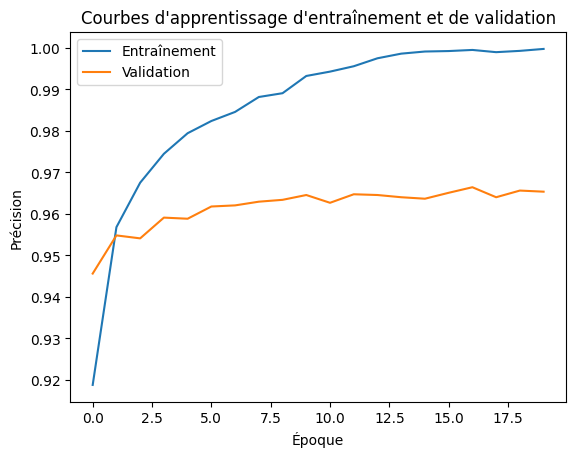

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml

# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les étiquettes en codage one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle séquentiel
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec un optimiseur SGD et une perte catégorielle_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_one_hot, epochs=20, validation_split=0.2, verbose=1)

# Évaluer la précision sur les données de test
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbes d\'apprentissage d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/20
1400/1400 [==============================] - 5s 3ms/step - loss: 0.6223 - accuracy: 0.8195 - val_loss: 0.3193 - val_accuracy: 0.9180
Epoch 2/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5424 - accuracy: 0.8515 - val_loss: 0.3208 - val_accuracy: 0.9271
Epoch 3/20
1400/1400 [==============================] - 5s 3ms/step - loss: 0.6473 - accuracy: 0.8410 - val_loss: 0.3357 - val_accuracy: 0.9217
Epoch 4/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.6808 - accuracy: 0.8383 - val_loss: 0.4218 - val_accuracy: 0.9283
Epoch 5/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.6930 - accuracy: 0.8438 - val_loss: 0.5542 - val_accuracy: 0.9033
Epoch 6/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8409 - accuracy: 0.8333 - val_loss: 0.6280 - val_accuracy: 0.9112
Epoch 7/20
1400/1400 [==============================] - 5s 4ms/step - loss: 0.7149 - accuracy: 0.8447 - val_loss: 0.4407 - val_accuracy:

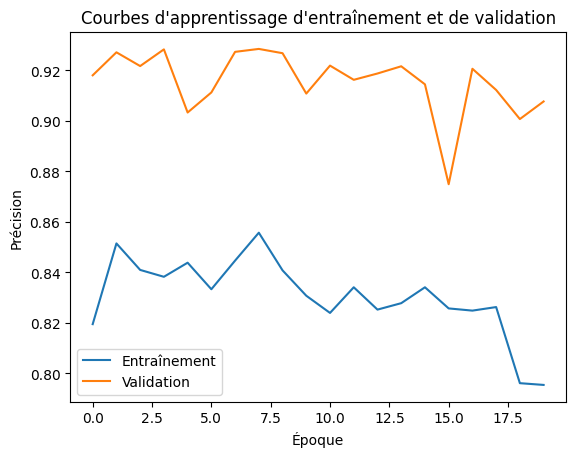

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml

# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les étiquettes en codage one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle séquentiel avec dropout
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Ajouter un dropout avec un taux de 0.5
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec un optimiseur SGD et une perte catégorielle_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_one_hot, epochs=20, validation_split=0.2, verbose=1)

# Évaluer la précision sur les données de test
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbes d\'apprentissage d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/20
1400/1400 [==============================] - 6s 4ms/step - loss: 0.4458 - accuracy: 0.8737 - val_loss: 0.2373 - val_accuracy: 0.9365
Epoch 2/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.3465 - accuracy: 0.9071 - val_loss: 0.2362 - val_accuracy: 0.9421
Epoch 3/20
1400/1400 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.9145 - val_loss: 0.2708 - val_accuracy: 0.9376
Epoch 4/20
1400/1400 [==============================] - 7s 5ms/step - loss: 0.2791 - accuracy: 0.9223 - val_loss: 0.2516 - val_accuracy: 0.9464
Epoch 5/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.9235 - val_loss: 0.2498 - val_accuracy: 0.9457
Epoch 6/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.2496 - accuracy: 0.9293 - val_loss: 0.2630 - val_accuracy: 0.9444
Epoch 7/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2920 - accuracy: 0.9271 - val_loss: 0.2644 - val_accuracy:

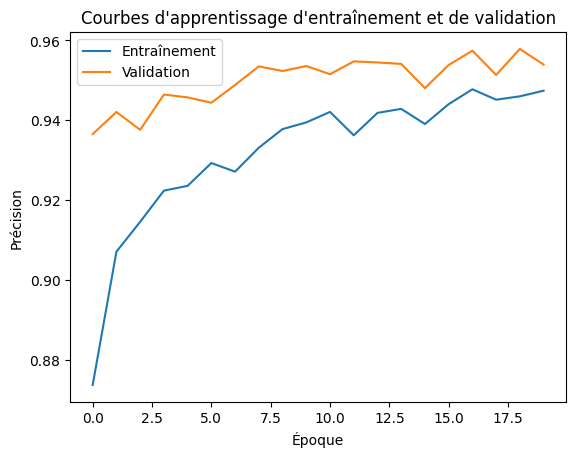

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml

# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les étiquettes en codage one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle séquentiel avec dropout
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Ajouter un dropout avec un taux de 0.3
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec un optimiseur SGD et une perte catégorielle_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_one_hot, epochs=20, validation_split=0.2, verbose=1)

# Évaluer la précision sur les données de test
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbes d\'apprentissage d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/20
1400/1400 [==============================] - 10s 6ms/step - loss: 0.3434 - accuracy: 0.9042 - val_loss: 0.2411 - val_accuracy: 0.9412
Epoch 2/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2246 - accuracy: 0.9399 - val_loss: 0.2034 - val_accuracy: 0.9501
Epoch 3/20
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1955 - accuracy: 0.9462 - val_loss: 0.2282 - val_accuracy: 0.9556
Epoch 4/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1749 - accuracy: 0.9538 - val_loss: 0.2237 - val_accuracy: 0.9535
Epoch 5/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1519 - accuracy: 0.9566 - val_loss: 0.2339 - val_accuracy: 0.9552
Epoch 6/20
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1170 - accuracy: 0.9651 - val_loss: 0.2080 - val_accuracy: 0.9599
Epoch 7/20
1400/1400 [==============================] - 6s 4ms/step - loss: 0.1142 - accuracy: 0.9662 - val_loss: 0.2033 - val_accuracy

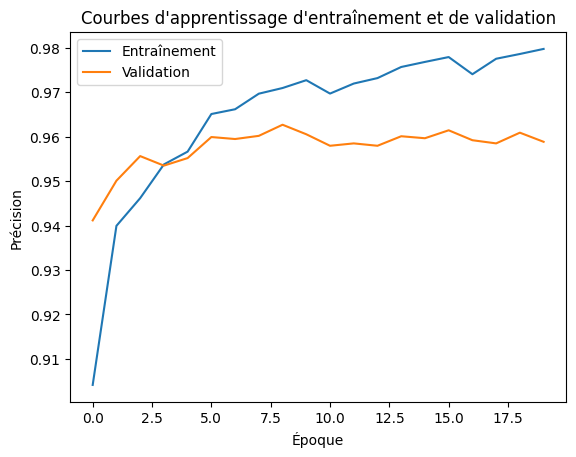

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml

# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les étiquettes en codage one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Créer un modèle séquentiel avec dropout
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.1))  # Ajouter un dropout avec un taux de 0.1
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec un optimiseur SGD et une perte catégorielle_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_one_hot, epochs=20, validation_split=0.2, verbose=1)

# Évaluer la précision sur les données de test
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbes d\'apprentissage d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Lambda, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml
import tensorflow as tf
# Charger les données
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir les étiquettes en codage one-hot
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Fonction pour appliquer DropConnect pendant l'entraînement
def dropconnect(W, p):
    return tf.nn.dropout(W, keep_prob=p) * p


# Créer un modèle séquentiel avec DropConnect
model = Sequential()
model.add(Dense(50, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Lambda(dropconnect, arguments={'p': 0.5}))  # Ajouter DropConnect avec un taux de 0.5
model.add(Dense(10, activation='softmax'))

# Compiler le modèle avec un optimiseur SGD et une perte catégorielle_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train_scaled, y_train_one_hot, epochs=20, validation_split=0.2, verbose=1)

# Évaluer la précision sur les données de test
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Afficher les courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbes d\'apprentissage d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


TypeError: ignored